In [1]:
import numpy as np
import pandas as pd
import rwi

from sklearn.decomposition import PCA


from sklearn.cluster import KMeans
import seaborn as sns; sns.set()
%matplotlib inline

In [2]:
import rwi
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [134]:
def load_df(name):
    eurusd_df = pd.read_csv(name)
    eurusd_df = eurusd_df.rename(columns={'<TICKER>':'Ticker', '<DTYYYYMMDD>':'Date', '<TIME>':'Time', '<OPEN>':'Open', '<HIGH>':'High', '<LOW>':'Low', '<CLOSE>':'Close', '<VOL>':'Vol'})
    eurusd_df[['Date']] = pd.to_datetime(eurusd_df['Date'].astype('str'), yearfirst=True)
    eurusd_df =eurusd_df.sort_values(by=['Date', 'Time'])
    eur_df = eurusd_df[['Date', 'Time', 'Close', 'Open', 'High', 'Low', 'Vol']].rename(columns={'Close':'Close'})
    eur_df['Change'] = eur_df['Close'].pct_change()
    eur_df.dropna(inplace=True)
    #eur_df = eur_df[eur_df.Date>'2020-01-01']
    #eur_df = eur_df.set_index('Date')
    return eur_df

In [135]:
import FinanceDataReader as fdr

In [136]:
#sp500 = fdr.DataReader('US500', start = '2009-01-01')

In [137]:
#sp500.to_csv('SP500.csv', encoding='utf-8')

In [210]:
sp500 = pd.read_csv('SP500.csv', encoding='utf-8')
sp500['Date'] = pd.to_datetime(sp500['Date'], yearfirst=True)
sp500 = sp500.set_index('Date')
#sp500 = sp500.loc[:'2019-12-31']
sp500['price'] = sp500['Close']

In [211]:
sp500 = sp500.resample('W').last()

In [212]:
sp500 = rwi.generate_features(sp500)

In [213]:
sp500['atr_5'] = sp500.returns.rolling(5).std()
sp500['atr_20'] = sp500.returns.rolling(20).std()
sp500['atr_50'] = sp500.returns.rolling(50).std()
sp500['range'] = 100*(sp500['High'] - sp500['Low'])/sp500['Low']
sp500['adj_close'] = sp500['Close'] / (sp500['High']*0.5 + sp500['Low']*0.5)
sp500['adj_close'] = sp500['adj_close'].replace([np.inf, -np.inf, 0], 0)



In [214]:
sp500.columns

Index(['Close', 'Open', 'High', 'Low', 'Volume', 'Change', 'price', 'returns',
       'ROC_2', 'ROC_3', 'ROC_5', 'ROC_20', 'ROC_50', 'ROC_100', 'ROC_200',
       'ROC_500', 'abs_returns', 'atr_5', 'atr_20', 'atr_50', 'range',
       'adj_close'],
      dtype='object')

In [215]:
sp500.drop(columns=['ROC_100', 'ROC_200',
       'ROC_500',  'ROC_50', 'atr_50'], inplace=True)

In [216]:
#sp500 = pd.get_dummies(sp500, columns=['month', 'day', 'week_day'])

In [217]:
sp500.loc[:,'shift_returns'] = sp500['returns'].shift(-1)
sp500.dropna(inplace=True) # .fillna(0, inplace=True)#

In [218]:
sp500 = sp500[sp500.shift_returns != 0.0]

In [219]:
sp500.drop(columns=['Close', 'Open', 'High', 'Low', 'Volume', 'Change', 'range', 'adj_close','price'], inplace=True)

In [220]:
sp500 = sp500.reset_index(drop=True)

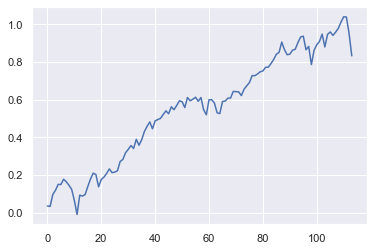

In [221]:
sp500.shift_returns.cumsum().plot()

In [222]:
sp500_ = sp500.copy()

In [223]:
sp500_.loc[:, ['returns', 'ROC_2', 'ROC_3', 'ROC_5', 'ROC_20', 'shift_returns']] = -1 * sp500_[['returns', 'ROC_2', 'ROC_3', 'ROC_5', 'ROC_20',  'shift_returns']]

In [224]:
sp500_ = sp500_.iloc[:int(sp500_.shape[0] * 0.75)]

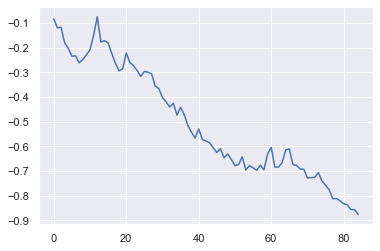

In [225]:
sp500_.returns.cumsum().plot()

In [226]:
sp500.iloc[int(sp500.shape[0] * 0.80):]

,returns,ROC_2,ROC_3,ROC_5,ROC_20,abs_returns,atr_5,atr_20,shift_returns
91,0.002715,-0.024537,-0.064264,0.000178,0.198659,0.002715,0.036781,0.021941,0.021378
92,0.021378,0.024093,-0.003159,0.011772,0.221272,0.021378,0.037898,0.021918,0.004831
93,0.004831,0.026209,0.028924,-0.038055,0.245720,0.004831,0.025095,0.020768,0.035388
94,0.035388,0.040219,0.061597,0.037059,0.247504,0.035388,0.023495,0.020868,0.029814
95,0.029814,0.065202,0.070033,0.094126,0.259281,0.029814,0.014637,0.021200,0.004285
96,0.004285,0.034099,0.069487,0.095696,0.245840,0.004285,0.014216,0.021254,-0.071929
97,-0.071929,-0.067644,-0.037830,0.002389,0.137388,0.071929,0.042882,0.027626,0.017702
98,0.017702,-0.054228,-0.049942,0.015260,0.155479,0.017702,0.043589,0.027672,-0.096265
99,-0.096265,-0.078564,-0.150493,-0.116393,0.050163,0.096265,0.056903,0.036141,0.075742
100,0.075742,-0.020523,-0.002821,-0.070466,0.114396,0.075742,0.069850,0.039665,0.029296


In [228]:
sp500.iloc[0:-10]

,returns,ROC_2,ROC_3,ROC_5,ROC_20,abs_returns,atr_5,atr_20,shift_returns
0,0.083928,0.035317,0.101832,-0.039088,0.323386,0.083928,0.077313,0.059358,0.036193
1,0.036193,0.120121,0.071510,0.082637,0.476036,0.036193,0.064891,0.050571,-0.002293
2,-0.002293,0.033900,0.117829,0.135733,0.391790,0.002293,0.053530,0.048955,0.063257
3,0.063257,0.060964,0.097157,0.132473,0.365274,0.063257,0.052948,0.047285,0.022393
4,0.022393,0.085650,0.083357,0.203478,0.335947,0.022393,0.033843,0.046643,0.031457
...,...,...,...,...,...,...,...,...,...
99,-0.096265,-0.078564,-0.150493,-0.116393,0.050163,0.096265,0.056903,0.036141,0.075742
100,0.075742,-0.020523,-0.002821,-0.070466,0.114396,0.075742,0.069850,0.039665,0.029296
101,0.029296,0.105038,0.008772,-0.045455,0.138889,0.029296,0.072346,0.040012,0.017766
102,0.017766,0.047061,0.122803,0.044240,0.137491,0.017766,0.063442,0.039990,0.038560


In [229]:
sp500 = pd.concat([sp500_,  sp500], axis=0).reset_index(drop=True)

In [230]:
X = sp500.drop(columns='shift_returns')
y = sp500['shift_returns']

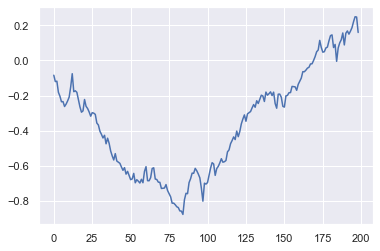

In [231]:
X.returns.cumsum().plot()

In [232]:
y = np.sign(y)
X = X.select_dtypes('number')

In [233]:
X_train= X.iloc[0:-100] #X.iloc[:int(X.shape[0] * 0.75)]
y_train = y[0:-100] #y[:int(X.shape[0] * 0.75)]
X_test = X.iloc[-114:] #X.iloc[int(X.shape[0] * 0.80):]
y_test = y[-114:] #y[int(X.shape[0] * 0.80):]
#X_train, X_test, y_train, y_test = train_test_split(  X, y, test_size=0.20, random_state=42)

In [234]:
clf = RandomForestClassifier(n_estimators= 1000, random_state=0, criterion='gini', n_jobs=-1)


In [235]:
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [236]:
y_pred = clf.predict(X_test)

In [237]:
score = clf.score(X_test, y_test)

In [238]:
from sklearn.metrics import roc_auc_score
rf_probs = clf.predict_proba(X_test)[:, 1]
# Calculate roc auc
roc_value = roc_auc_score(y_test, rf_probs)

In [239]:
# we have to reove low tf indicators
print(score, roc_value)

0.7 0.7083333333333334


In [240]:
X_test.columns

Index(['returns', 'ROC_2', 'ROC_3', 'ROC_5', 'ROC_20', 'abs_returns', 'atr_5',
       'atr_20'],
      dtype='object')

In [241]:
X_train.columns

Index(['returns', 'ROC_2', 'ROC_3', 'ROC_5', 'ROC_20', 'abs_returns', 'atr_5',
       'atr_20'],
      dtype='object')

In [249]:
X_test['shift_returns'] = sp500.loc[X_test.index]['shift_returns']
X_test['pred'] = y_pred
X_test['direction'] = np.sign(X_test.shift_returns)
X_test['res'] = X_test.shift_returns  * X_test['pred']

C:\Users\lexik\.conda\envs\NN\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\lexik\.conda\envs\NN\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\lexik\.conda\envs\NN\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See

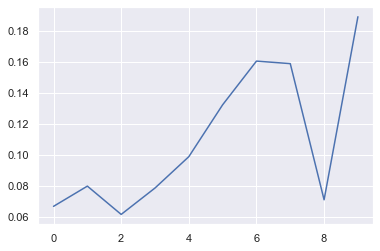

In [251]:
((X_test.reset_index().res ).cumsum()).fillna(0).plot()

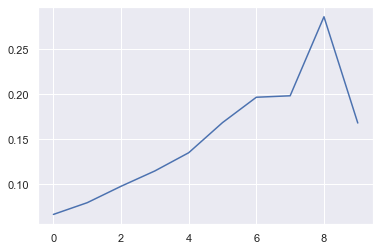

In [244]:
# 10h
(X_test.reset_index().res.cumsum()).plot()

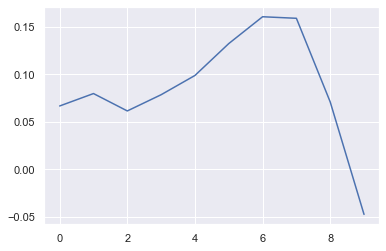

In [252]:
X_test.reset_index().shift_returns.cumsum().plot()

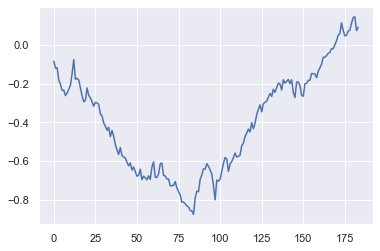

In [246]:
X_train.reset_index().returns.cumsum().plot()

In [254]:
def apply_pca(X_):
    
    pca = PCA(n_components=3,  random_state=40)

    pca_X = pca.fit_transform(X_.fillna(0)) 

    #print(pca.explained_variance_ratio_)

    #print(pca.singular_values_)
    pca_X = pd.DataFrame(pca_X, columns=['p1', 'p2', 'p3'])
    return pca_X

In [273]:
cols = ['ROC_20',  'atr_20', 'ROC_5', 'atr_5']
pca_X = apply_pca(X_train[cols])
kmeans = KMeans(2, random_state=40).fit(pca_X)
pca_X = apply_pca(X_test[cols])
clusters = kmeans.predict(pca_X)
X_test.loc[:,'clusters'] = clusters

C:\Users\lexik\.conda\envs\NN\lib\site-packages\pandas\core\indexing.py:964: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [274]:
X_test['res_bin'] = np.sign(X_test.res)

C:\Users\lexik\.conda\envs\NN\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [277]:
X_test[X_test.clusters==0].groupby(X_test.res_bin).count()

,returns,ROC_2,ROC_3,ROC_5,ROC_20,abs_returns,atr_5,atr_20,shift_returns,pred,direction,res,clusters,res_bin
res_bin,,,,,,,,,,,,,,
1.0,4,4,4,4,4,4,4,4,4,4,4,4,4,4


In [272]:
3/5

0.6

In [266]:
# improve with xgboost
# hyper parameter optimization
# finalize model
# use PCA custering to improve accuracy of results

In [245]:
# swithc from Xgboost to LSTM
# test
# swithc from PCA to VAE

In [246]:
# do backtesting step by step